# Sentiment Analysis Using Multinomial Logistic Regression

In this project, you’ll use the Twitter Tweets Sentiment Dataset for sentiment analysis with multinomial logistic regression to classify tweets as 
positive, negative, or neutral.

The Twitter Tweets Sentiment Dataset comprises 27,481 tweets with 8,582 positive tweets, 7,781 negative tweets, and 11,118 neutral tweets. The corpus 
comprises the following columns:

textID: This is the unique ID of the tweet.

text: This is the complete text of the tweet.

selected_text: This is a word or phrase selected from the tweet that expresses the sentiment.

sentiment: This is the sentiment of the tweet (positive, negative, or neutral).

Note: In this project, we’ll only use 6000 tweets, 2000 each from positive, negative, and neutral classes. This is done to keep the model training and
testing times manageable. Furthermore, we have dropped the “textID” and “selected_text” columns from the dataset.



## Task 1: Import Libraries

Let’s start the project by importing the required libraries. In this project, you’ll make use of several libraries, including string, numpy, pandas,
tqdm, and sklearn. We will also use functions to calculate metrics such as confusion matrix and classification report, and to plot results using
matplotlib.

Import the following libraries to complete this task:

1. string: To perform common string operations

2. numpy: For numerical computing

3. pandas: For data analysis and manipulation

4. tqdm: To show a progress bar during model training

5. matplotlib: To plot results and visualize metrics and other performance measures

6. sklearn.model_selection: To split datasets into train and test sets

7. sklearn.feature_extraction.text: To extract features from text data, such as the CountVectorizer, which is used for converting text into a matrix 
of token counts

8. sklearn.metrics: To evaluate the model’s performance, including functions to compute confusion matrix and classification report



In [1]:
import string
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Task 2: Load the Dataset

In this task, load the dataset file into a pandas DataFrame. The dataset comprises two columns “sentiment,” and “tweet,” The “tweet” column contains
the tweet text and the “sentiment” column contains its label (“positive”, “negative”, “neutral”).

Follow the given steps to complete this task:

1. Read the dataset file named Tweets.csv into the pandas DataFrame.
    
2. Print the first few rows of the DataFrame to verify the data inside the DataFrame.

    

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/usercode/Tweets.csv')

# Print the DataFrame head
print(df.head())

  sentiment                                              tweet
0   neutral  Happy Monday tweeples... hope it wasn`t to har...
1  negative  I can`t believe I thought I had a morning shif...
2   neutral  So its Superstar Sunday?  is one superstar I k...
3  positive   yay i hit 50 subscribers on youtube. go me  lol.
4   neutral                               Today = marking *135


In [3]:
df.shape

(6000, 2)

## Task 3: Remove Punctuation from Tweets

In this task, remove the punctuation characters from the tweets. This will help simplify the data since punctuation marks do not usually carry
significant meaning in the context of text analysis. This will also reduce noise in the data and the dimensionality of the feature space, which can
lead to a more efficient and effective model.

To complete this task, perform the following operations:

1. Create a function that takes a string text as input and removes any punctuation characters from it.

2. Apply the function to the first column, “tweet,” of the DataFrame.
    
3. Print the first few rows of the modified DataFrame to verify the change.



In [4]:
# Define a function to remove punctuation from a string
def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

# Apply the function to the first column of the DataFrame
df.iloc[:, 1] = df.iloc[:, 1].apply(remove_punctuation)

# Print the DataFrame head
print(df.head())

  sentiment                                              tweet
0   neutral  Happy Monday tweeples hope it wasnt to hard to...
1  negative  I cant believe I thought I had a morning shift...
2   neutral  So its Superstar Sunday  is one superstar I kn...
3  positive     yay i hit 50 subscribers on youtube go me  lol
4   neutral                                 Today  marking 135


## Task 4: Split Tweets into a Bag of Words

After removing the punctuation from each tweet, you’ll split each string value in the “tweet” column into a bag of words and update the column with 
the modified values.

Perform the following operations to complete this task:

1. Apply a lambda function to the “tweet” column of the DataFrame. The lambda function should split each string in the tweet column into a bag of words.

2. Print the first few rows of the modified DataFrame to verify the change.


In [5]:
# Split each tweet into a bag of words
df['tweet'] = df['tweet'].apply(lambda x: x.split())

# Print the DataFrame head
print(df.head())

  sentiment                                              tweet
0   neutral  [Happy, Monday, tweeples, hope, it, wasnt, to,...
1  negative  [I, cant, believe, I, thought, I, had, a, morn...
2   neutral  [So, its, Superstar, Sunday, is, one, supersta...
3  positive  [yay, i, hit, 50, subscribers, on, youtube, go...
4   neutral                              [Today, marking, 135]


## Task 5: Create a Vocabulary and Remove Stop Words

In this task, we create a vocabulary of all words that have occurred in the tweets. Then remove the stop words from this vocabulary.

Stop words are common words in a language (e.g., “the,” “is,” “and,” etc.) that do not carry significant meaning and are often used in various 
contexts. Removing stop words helps to reduce noise in the text data, as these words are unlikely to contribute much to the overall understanding or
sentiment of the tweet. Furthermore, by removing them, you can reduce the size of the feature space and the computational resources required for 
training and inference. This can lead to faster model training and prediction.

Follow the given steps to remove the stop words:

1. Count the frequencies of all words that have occurred in the tweets in a dictionary.

2. Sort the dictionary by its values in descending order.

3. Remove the 100 most frequent words.

4. Store the remaining words and their frequencies in a new dictionary.

5. Extract the keys from the dictionary and assign them to a list.


In [6]:
# Count occurrences of each word
vocabulary_dict = {}
for row in df['tweet']:
    for word in row:    
        if word.lower() in vocabulary_dict:
            vocabulary_dict[word.lower()] += 1
        else:
            vocabulary_dict[word.lower()] = 1

# Remove the stop words
vocabulary_dict = sorted(vocabulary_dict.items(), key = lambda x: x[1], reverse = True)
vocabulary_dict = vocabulary_dict[100:]
vocabulary_dict = dict(vocabulary_dict)

# Extract keys from the dictionary
vocabulary = list(vocabulary_dict.keys())

In [7]:
len(vocabulary)

10563

In [12]:
vocabulary[0] , vocabulary[100] , vocabulary[1000] , vocabulary[10000] , vocabulary[10562]

('sorry', '1', 'no1', 'brinn', 'passtime')

## Task 6: Create Feature Vectors

Now that you’ve created a vocabulary and removed the stop words, use it to create feature vectors for the tweets. Then convert the resulting 
sparse matrix to a dense NumPy array. This array will later be used for training and testing the model.

Follow the given steps to create feature vectors for tweets:

1. For each tweet in the “tweet” column of the DataFrame, convert each word to lowercase and join them back into a string.

2. Tokenize the tweets and create feature vectors based on the vocabulary. The resulting tweet vector will be a sparse matrix representation of the 
tweets.

3. Convert the tweet vectors sparse matrix to a dense numpy array. The resulting array will contain the feature vectors for each tweet.
                                                                                                                       
4. Print the NumPy array.
                                                                                                                       

In [13]:
# Extract tweets and convert to lowercase
tweets = [' '.join([word.lower() for word in tweet]) for tweet in df['tweet']]

# Create the CountVectorizer with the vocabulary
vectorizer = CountVectorizer(vocabulary=vocabulary)

# Fit and transform the tweets into feature vectors
tweet_vectors = vectorizer.fit_transform(tweets)

# Convert tweet_vectors to NumPy array
X = tweet_vectors.toarray()

# Print the NumPy array
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


## Task 7: Map and Extract the Sentiment Column

In this task, map the sentiment labels in the “sentiment” column of the DataFrame to numerical values. Then extract the mapped values into a 
NumPy array.

This mapping of string labels to numerical values ensures compatibility with the model and allows for effective processing. It also enables the use of
categorical encoding techniques, such as one-hot encoding, that you’ll use later in this project.

Follow the given steps to complete this task:

1. Replace the original sentiment labels in the “sentiment” column with their corresponding integer values 
   (2 for positive, 1 for neutral, and 0 for negative).

2. Extract the values from the modified “sentiment” column into a NumPy array.



In [14]:
# Define the mapping dictionary
mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Map the values in the column using the mapping dictionary
df['sentiment'] = df['sentiment'].map(mapping)

# Extract sentiment from the DataFrame
y = df['sentiment'].values

In [15]:
y

array([1, 0, 1, ..., 0, 2, 2])

## Task 8: Split the Dataset into Training and Test Sets

In this task, split the feature vectors and the corresponding sentiment labels into training and testing subsets in an 80:20 ratio, with 
stratified sampling to preserve the distribution of sentiment labels. The training dataset will be used to train the model, and the testing dataset
will be used to evaluate the model’s performance after training is complete as an independent evaluation set.

Stratified sampling ensures that the splitting process maintains the same proportion of sentiment labels in training and testing subsets. 
This is useful when dealing with imbalanced datasets to ensure a representative distribution of the classes in the subsets.

To complete this task, perform the following operations:

1. Split the feature vectors and the array of corresponding sentiment labels into training and testing subsets in a ratio of 80:20.

2. Print the shapes of the resulting subsets to verify the split.


In [16]:
# Split the data into training and testing subsets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of resulting subsets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800, 10563)
(1200, 10563)
(4800,)
(1200,)


## Task 9: Define the Weights Initialization Function

In this task, initialize the weights for the model using the number of features and classes.

To complete this task, create a function initialize_weights() that takes two parameters: n_features and n_classes. Inside the function,
do the following:

1. Create a NumPy array of zeros with a shape of (n_features, n_classes), where n_features represents the number of features and n_classes represents
the number of classes.
    
2. Return the created array, which serves as the initialized weights.


In [17]:
def initialize_weights(n_features, n_classes):
    return np.zeros((n_features, n_classes))

## Task 10: Define One-Hot Encoding Function

In this task, write the one_hot_encode() function to convert an array of class labels y into a one-hot encoded representation. The resulting array
will have dimensions (n_samples, n_classes), where each row will represent a sample and each column will represent a class. The elements corresponding
to the class labels in y will be marked as 1, while the rest will be 0.

To complete this task, create a function one_hot_encode() that takes two parameters: y and n_classes. Here, y is the array of class labels and
n_classes represents the number of classes. Inside the function, do the following:

1. Create a NumPy array y_encoded, with a shape of (n_samples, n_classes), filled with zeros, where n_samples represents the number of samples.

2. Perform one-hot encoding for each sample by marking the corresponding class position with 1 and leaving the rest as 0.

3. Return the y_encoded array, representing the one-hot encoded version of the input array y.



In [18]:
def one_hot_encode(y, n_classes):
    n_samples = len(y)
    y_encoded = np.zeros((n_samples, n_classes))
    for i in range(n_samples):
        y_encoded[i, y[i]] = 1
    return y_encoded

## Task 11: Define the Softmax Function

In this task, write the softmax() function that takes an input array x, computes the softmax activation for each element, and returns the resulting
array of normalized values. The softmax function is commonly used in multiclass classification problems to convert raw scores or logits into
probabilities representing class probabilities.

To complete this task, create a function softmax() that applies the softmax activation function to an input array x and returns the resulting array 
of normalized values, representing the output of the softmax function.


In [19]:
def softmax(x):
    exp = np.exp(x)
    return exp / np.sum(exp, axis=1, keepdims=True)

## Task 12: Define the Gradient Descent Function

In this task, implement the gradient_descent() function to apply gradient descent to update the weights and the bias of our model based on the 
feature matrix X, the one-hot encoded target values y_encoded, the initial weights, the initial bias, and the learning rate.

To complete this task, create a function gradient_descent() that takes five parameters: X, y_encoded, weights, bias, and learning_rate. Inside the
function, do the following:

1. Compute the scores by performing matrix multiplication between the feature matrix X and the weights matrix, and add the bias term. Store the result in 
the scores array.
    
2. Calculate the probabilities by applying the softmax function to the scores array.

3. Compute the error by subtracting the one-hot encoded target values y_encoded from the predicted probabilities.

4. Compute the gradient of the weights by multiplying the transpose of the feature matrix X with the error and dividing it by the number of samples.

5. Compute the gradient of the bias by summing the error along the first axis and dividing it by the number of samples.

6. Update the weights by subtracting the learning rate multiplied by the gradient of the weights.
    
7. Update the bias by subtracting the learning rate multiplied by the bias gradient.

8. Return the updated weights and bias as the output of the function.


In [20]:
def gradient_descent(X, y_encoded, weights, bias, learning_rate):
    n_samples = len(X)
    scores = np.dot(X, weights) + bias
    probabilities = softmax(scores)
    error = probabilities - y_encoded
    dw = np.dot(X.T, error) / n_samples
    db = np.sum(error, axis=0) / n_samples
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

## Task 13: Define the Training Function

In this task, write the train_multinomial_logistic_regression() function to train the multinomial logistic regression model by performing gradient 
descent updates on the weights and bias.

To complete this task, create a function, train_multinomial_logistic_regression(), that takes four parameters: X (the input features),
y (the target variable), learning rate, and maximum iterations. Inside the function, do the following:

1. Initialize the weights matrix by calling the initialize_weights function, passing n_features and n_classes as parameters.

2. Initialize the bias vector as an array of zeros with a length equal to the number of classes.

3. Encode the target array y into a one-hot encoded representation using the one_hot_encode function, passing y and n_classes as parameters. 
Store the resulting encoded array as y_encoded.

4. Update the weights and bias by calling the gradient_descent function max_iterations times. Pass the feature matrix X, the one-hot encoded 
target values y_encoded, the weights, the bias, and the learning rate as parameters.

5. Return the updated weights and bias as the output of the function.



In [21]:
def train_multinomial_logistic_regression(X, y, learning_rate, max_iterations):
    n_samples, n_features = np.shape(X)
    n_classes = len(np.unique(y))
    
    weights = initialize_weights(n_features, n_classes)
    bias = np.zeros(n_classes)
    y_encoded = one_hot_encode(y, n_classes)
    
    for _ in tqdm(range(max_iterations), desc="Training", unit="iteration"):
        weights, bias = gradient_descent(X, y_encoded, weights, bias, learning_rate)
    
    return weights, bias

## Task 14: Define the Prediction Function

In this task, write the predict() function that takes a feature matrix X, the weights, and the bias of our multinomial logistic regression model.
It’ll compute the scores and probabilities for each sample and return the predicted class labels based on the maximum probability for each sample.

To complete this task, create a function, predict(), that takes three parameters: X, weights, and bias to make predictions using the trained
multinomial logistic regression model. Inside the function, do the following:

1. Compute the scores by performing matrix multiplication between the feature matrix X and the weights matrix, and add the bias term. Store the result 
in the scores array.
    
2. Calculate the probabilities by applying the softmax() function to the scores array.
    
3. Find the index of the maximum probability for each sample along the second axis. This corresponds to the predicted class label for each sample.
                                                                                                                                 
4. Return the array of predicted class labels.
                                                                                                                                 

In [22]:
def predict(X, weights, bias):
    scores = np.dot(X, weights) + bias
    probabilities = softmax(scores)
    return np.argmax(probabilities, axis=1)

## Task 15: Train the Model

Now that you’ve written all the functions to implement multinomial logistic regression, it is time to train the model on the training data using a 
specified learning rate and a maximum number of iterations. The resulting trained weights and bias will be stored and used to make predictions 
using the test data.

To complete this task, invoke the train_multinomial_logistic_regression() function to train the multinomial logistic regression model using the
training data X_train and y_train. Also, pass the learning rate and a maximum number of iterations as parameters.


In [23]:
# Initialize learning rate and maximum iterations
learning_rate = 0.31101
max_iterations = 500

# Train the model
weights, bias = train_multinomial_logistic_regression(X_train, y_train, learning_rate, max_iterations)

Training: 100%|██████████| 500/500 [05:52<00:00,  1.42iteration/s]


## Task 16: Test the Model

In this task, you’ll use the predict() function with the updated weights and bias from the last task to predict the class labels for the test data. 
The predict() function will compute the scores and probabilities for each sample in the test data and return the predicted class labels.

To complete this task, follow the given steps:

1. Invoke the predict() function using the test data and store the predicted class labels as y_pred.
    
2. Print y_pred, the predicted class labels for the test data.


In [24]:
# Test the model
y_pred = predict(X_test, weights, bias)

# Print the predicted class labels
print(y_pred)

[0 2 2 ... 0 1 1]


In [26]:
pd.Series(y_pred).value_counts()

1    511
0    345
2    344
Name: count, dtype: int64

## Task 17: Generate the Confusion Matrix and Classification Report

In this task, generate a confusion matrix based on the true and predicted labels. Furthermore, you’ll print a classification report that summarizes 
the performance of the multinomial logistic regression model on the test data. This report will include metrics for each class label,
providing insights into precision, recall, F1-score, and support.

Follow the given steps to complete this task:

1. Generate a confusion matrix based on the true labels, y_test, and the predicted labels, y_pred, obtained from the multinomial logistic regression
model.

2. Plot the confusion matrix.

3. Generate a classification report using the true labels, y_test, and the predicted labels, y_pred.

4. Print the classification report.



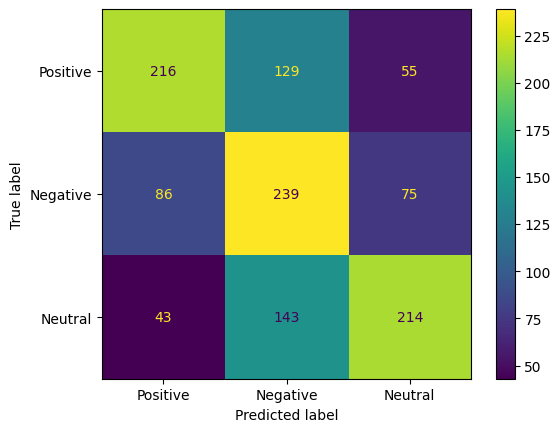

              precision    recall  f1-score   support

    Positive       0.63      0.54      0.58       400
    Negative       0.47      0.60      0.52       400
     Neutral       0.62      0.54      0.58       400

    accuracy                           0.56      1200
   macro avg       0.57      0.56      0.56      1200
weighted avg       0.57      0.56      0.56      1200



In [27]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
labels = ["Positive", "Negative", "Neutral"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

## Generate a classification report
print(classification_report(y_test, y_pred, target_names=['Positive', 'Negative', 'Neutral']))